# A) Load and explore data

### 1. Import the required libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import math

from sklearn.metrics import mean_squared_error
import re as re

In [2]:
filepath = "Dataset/fifa.csv"
df= pd.read_csv(filepath)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [4]:
df_fifa_vi = pd.read_csv('Dataset/fifa_ variable_information.csv')
df_fifa_vi.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [5]:
df.shape

(18207, 60)

In [6]:
df_fifa_vi.shape

(59, 2)

### 3. Drop the columns which you think redundant for the analysis.

In [7]:
df.drop(["Photo", "Flag", "Club Logo"], axis=1, inplace=True)

In [8]:
df.shape

(18207, 57)

# ---------------------------------------------------------------------------------------------------

# B) Data Cleaning and Preprocessing

### 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype* after getting rid of currency symbol and suffix.

###### - Before Cleaning

In [9]:
df['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [10]:
df['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [11]:
df['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [12]:
def clearCurrency(x):
            if(x.find('M')!= -1 and x!='NA'):
                z=x.replace("M","")
                y=float(z)
                return(y*1000000)                
            elif(x.find('K')!= -1 and x!='NA'):
                z=x.replace("K","")
                y=float(z)
                return(y*1000)

###### - After Cleaning

In [13]:
df['Release Clause']=df['Release Clause'].astype('string')
df['Release Clause']=df['Release Clause'].str.replace("€","")              
df['Release Clause']=df['Release Clause'].astype(str).apply(clearCurrency)

df['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

In [14]:
df['Wage']=df['Wage'].astype('string')
df['Wage']=df['Wage'].str.replace("€","")
df['Wage']=df['Wage'].astype(str).apply(clearCurrency)

df['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [15]:
df['Value']=df['Value'].astype('string')
df['Value']=df['Value'].str.replace("€","")
df['Value']=df['Value'].astype(str).apply(clearCurrency)

df['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

### 5. Convert the column "Joined" into integer data type with keeping only the year.

In [16]:

df['Joined']=pd.to_datetime(df['Joined'])
df['Joined']= df['Joined'].dt.year
df['Joined']=df['Joined'].fillna(0.0).astype(int);

df['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

### 6. Convert the column "Contract Valid Until" to pandas datetime type.

In [17]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])

df['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

### 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points. 

In [18]:

df['Height']=df['Height'].astype('string')
df['Height']= df['Height'].str.replace('\'','.')
df['Height']= df['Height'].astype(float)

df['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

### 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [19]:

df['Weight']=df['Weight'].astype('string')
df['Weight']= df['Weight'].str.replace('lbs','')
df['Weight']= df['Weight'].astype(float)

df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

### 9.Check for the percentage of missing values and impute them with appropriate imputation techniques.

In [20]:
# Missing Values List - Before replacing 
df.isnull().sum()/len(df) * 100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        1.384083
Wage                         1.323667
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       0.000000
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

In [21]:
#Dropping Loanded Columns as 93% blanks
df.drop('Loaned From', axis=1, inplace=True)

In [22]:
#filling null values with median in numerical_column and mode in categorical_column
missing_values = df.isnull().sum()/len(df)

index = [i   for i in missing_values[missing_values>0].index]

numerical_columns = [i   for i in index   if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i   for i in index   if i in df.columns and  df[i].dtype==object]

 
for columns in numerical_columns:

    df[columns] = df[columns].fillna(df[columns].median())


for columns in categorical_columns:

    df[columns] = df[columns].fillna(df[columns].mode()[0])


In [23]:
# Missing Values List - After replacing 
df.isnull().sum()/len(df) * 100

ID                          0.0
Name                        0.0
Age                         0.0
Nationality                 0.0
Overall                     0.0
Potential                   0.0
Club                        0.0
Value                       0.0
Wage                        0.0
Preferred Foot              0.0
International Reputation    0.0
Weak Foot                   0.0
Skill Moves                 0.0
Work Rate                   0.0
Body Type                   0.0
Position                    0.0
Jersey Number               0.0
Joined                      0.0
Contract Valid Until        0.0
Height                      0.0
Weight                      0.0
Crossing                    0.0
Finishing                   0.0
HeadingAccuracy             0.0
ShortPassing                0.0
Volleys                     0.0
Dribbling                   0.0
Curve                       0.0
FKAccuracy                  0.0
LongPassing                 0.0
BallControl                 0.0
Accelera

# ------------------------------------------------------------------------------------------------------

# C) Exploratory Data Analysis

### 10. Plot the distribution of Overall rating for all the players and write your findings

C:\Users\SA529MU\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SA529MU\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


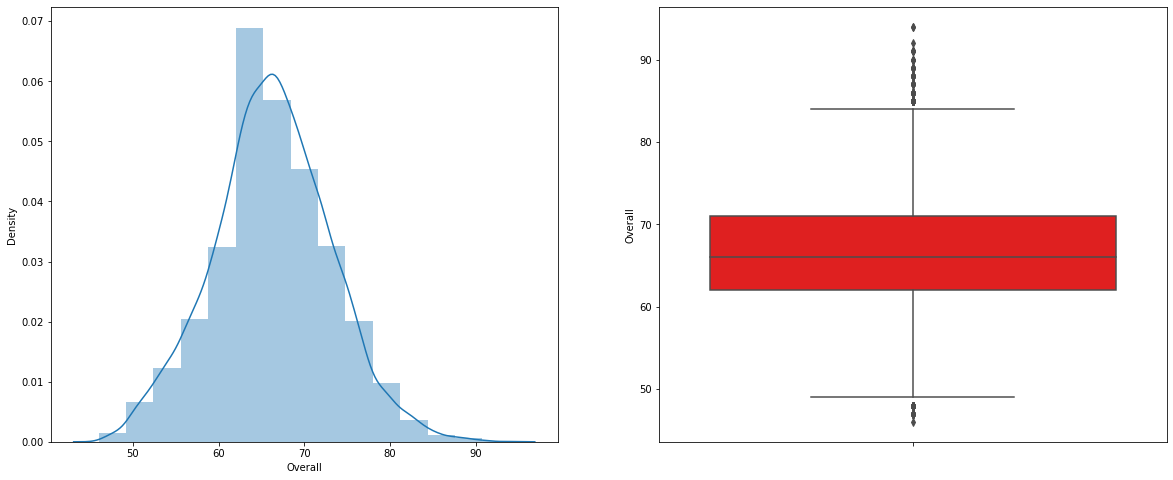

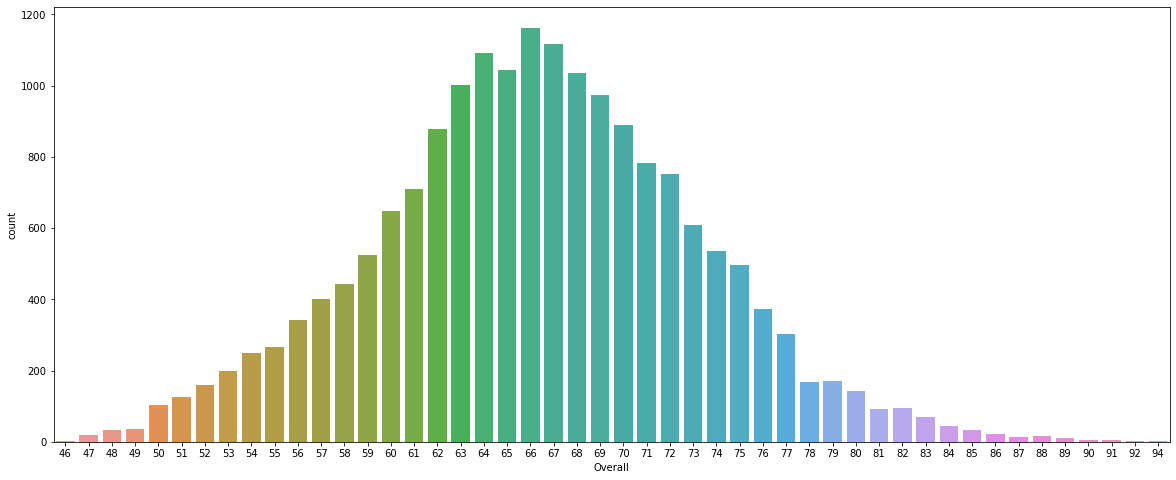

Mean:  66.23869940132916


In [24]:
Fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.distplot(df['Overall'], bins=15, ax=ax[0])
sns.boxplot(y=df['Overall'], ax=ax[1], color='red')
plt.figure(figsize=(20,8))
sns.countplot(df['Overall'])
plt.show()
print('Mean: ',df['Overall'].mean())

##### FInding for Question 10 : 
- Box Plot shows there are outliers in the data.
- Overall ranges from 46 to 94.
- Maximum players having overall rating between 60 to 72.

### 11. Retrieve the names of top20 players based on the Overall rating.

In [25]:
top_20 = df.groupby('Name')['Overall'].max().sort_values(ascending=False).head(20)
top_20

Name
Cristiano Ronaldo    94
L. Messi             94
Neymar Jr            92
Sergio Ramos         91
E. Hazard            91
De Gea               91
L. Suárez            91
L. Modrić            91
K. De Bruyne         91
D. Godín             90
David Silva          90
T. Kroos             90
J. Oblak             90
R. Lewandowski       90
H. Kane              89
T. Courtois          89
S. Agüero            89
M. ter Stegen        89
Sergio Busquets      89
E. Cavani            89
Name: Overall, dtype: int64

### 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [26]:

top20_df = df.sort_values(by='Overall', ascending=False).iloc[:20,]
top20_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


### 13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11)

In [27]:

avgAge= str(top20_df[['Age']].mean())
avgWage= str(top20_df[['Wage']].mean())

print('Average Age : ' + avgAge + ' Yrs and Average Wage : €' + avgWage)

Average Age : Age    29.55
dtype: float64 Yrs and Average Wage : €Wage    294950.0
dtype: float64


### 14.Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [28]:
topWage=top20_df[['Wage']].idxmax()
top20_df[['Name','Wage']].iloc[topWage]


,Name,Wage
0,L. Messi,565000.0


### 15)Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.

In [29]:

df2= df[['Name','Club','Wage','Overall']]
df2

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,1000.0,47
18203,N. Christoffersson,Trelleborgs FF,1000.0,47
18204,B. Worman,Cambridge United,1000.0,47
18205,D. Walker-Rice,Tranmere Rovers,1000.0,47


#### 15.i) find the average Overall rating for each club.

In [30]:
df_club_rating = df2[['Club','Overall']].groupby(['Club']).mean()
df_club_rating

,Overall
Club,
SSV Jahn Regensburg,65.586207
1. FC Heidenheim 1846,65.750000
1. FC Kaiserslautern,63.384615
1. FC Köln,70.785714
1. FC Magdeburg,65.615385
...,...
Zagłębie Sosnowiec,60.760000
Çaykur Rizespor,66.900000
Örebro SK,60.481481


### 15.ii) Display the average overall rating of Top10 Clubs using a plot

In [31]:
df_club_rating_top10 = df_club_rating.sort_values(by='Overall', ascending=False).iloc[:20,]
df_club_rating_top10

,Overall
Club,
Juventus,82.280000
Napoli,80.000000
Inter,79.750000
Real Madrid,78.242424
Milan,78.074074
FC Barcelona,78.030303
Paris Saint-Germain,77.433333
Roma,77.423077
Manchester United,77.242424


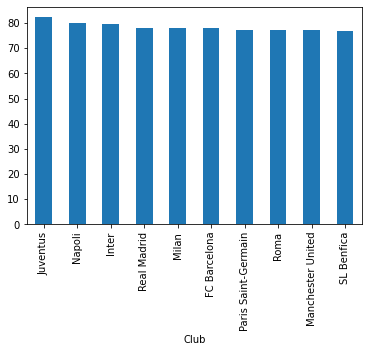

In [32]:
df_club_rating_top10['Overall'].head(10).plot(kind='bar')
plt.show()

### 16) What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same.

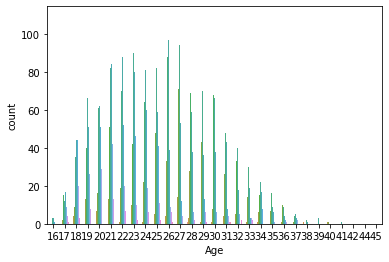

In [33]:
g=sns.countplot(x='Age',hue='Potential',data=df)
g.legend_.remove()

C:\Users\SA529MU\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


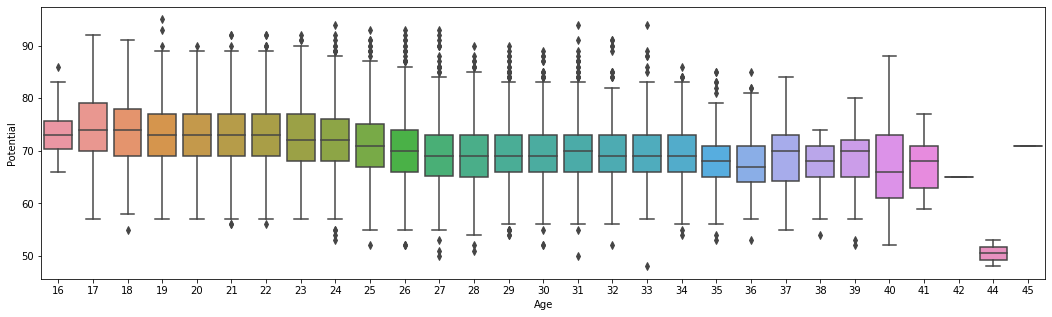

In [34]:
#visualize relationship between age and individual potential
plt.figure(figsize=(18, 5))
sns.boxplot(df['Age'], df['Potential'])
plt.show()

####  Comments for Q 16
- We can see that the maximum potential of a player is between the age 21 to 27 and it starts to reduce after that age
- Age is inversely proportional to the individual potential.
- The peak of potential is at age 17 and the maximum potential is at age 19 as an outlier.
- In some cases we can observe that potential is higher for higher age in the form of outlier.

### 17) Which features directly contribute to the wages of the players?Support your answer with a plot and a metric.

In [35]:

df_wage_rel = df[['Potential','Overall','Value','International Reputation','Release Clause','Wage']]
df_wage_rel.corr()

,Potential,Overall,Value,International Reputation,Release Clause,Wage
Potential,1.000000,0.660939,0.576267,0.372887,0.551895,0.486523
Overall,0.660939,1.000000,0.627674,0.499654,0.592035,0.572571
Value,0.576267,0.627674,1.000000,0.653537,0.969774,0.858262
International Reputation,0.372887,0.499654,0.653537,1.000000,0.619632,0.668940
Release Clause,0.551895,0.592035,0.969774,0.619632,1.000000,0.823170
Wage,0.486523,0.572571,0.858262,0.668940,0.823170,1.000000


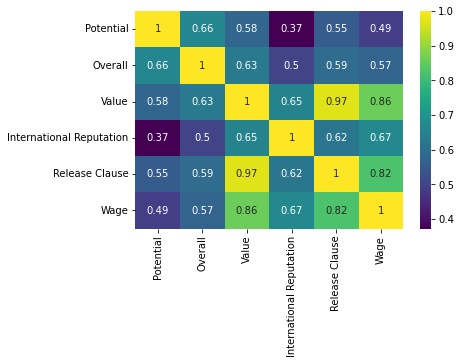

In [36]:
sns.heatmap(df_wage_rel[['Potential','Overall','Value','International Reputation','Release Clause','Wage']].corr(), annot=True, cmap='viridis')
plt.show()

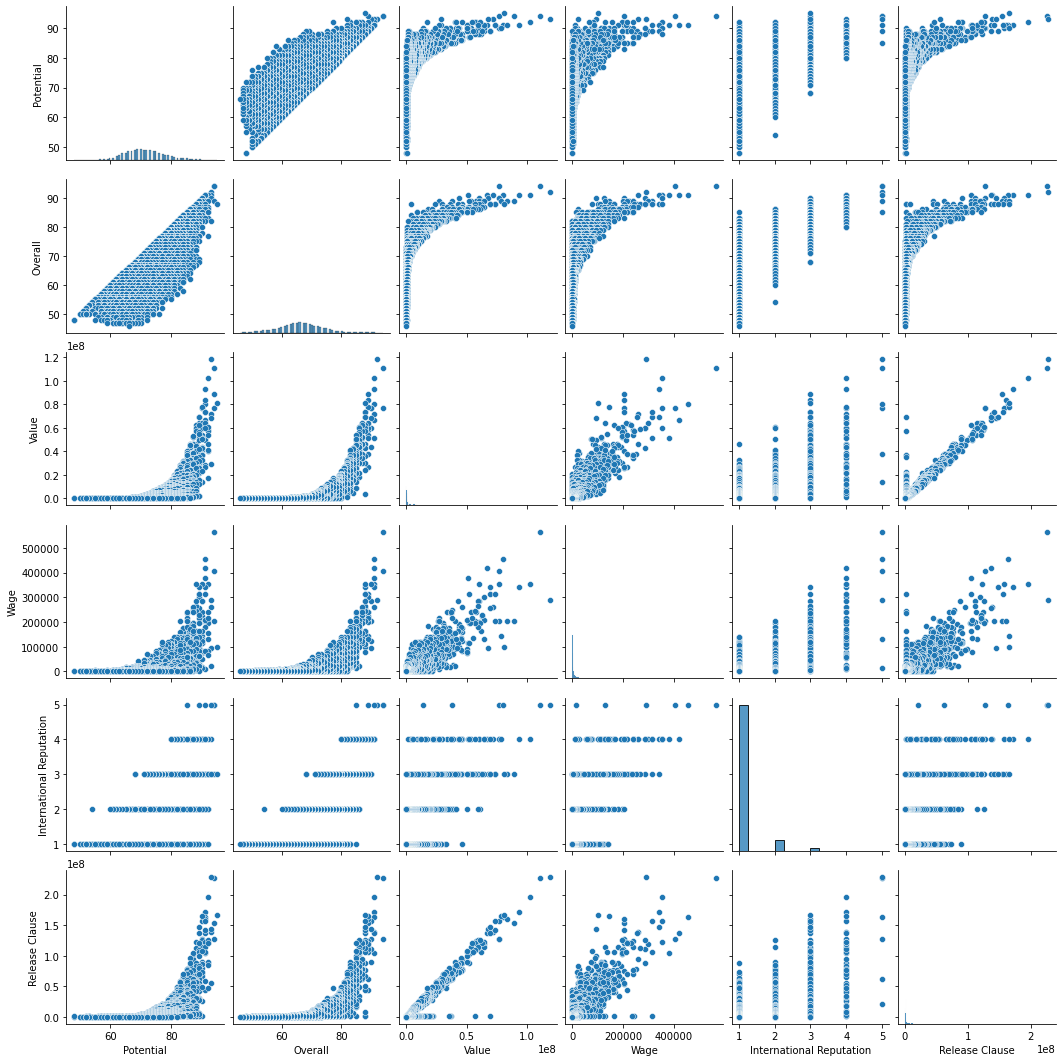

In [37]:
target = df_wage_rel['Wage']
sns.pairplot(df_wage_rel[['Potential', 'Overall', 'Value', 'Wage', 'International Reputation', 'Release Clause']])
plt.show()

####  Comments for Q 17
- We can see that Potential, Overall, Value, International Reputation, Release Clause are highly contributed to Wages.
- As any of the rest columns value increase their is significant increase in wages.

### 18) Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot.

In [38]:
#position where max no. of player palyed
df['Position'].value_counts().sort_values(ascending=False).head(1)

ST    2212
Name: Position, dtype: int64

In [39]:
#position where min no. of players played
df['Position'].value_counts().sort_values(ascending=True).head(1)

LF    15
Name: Position, dtype: int64

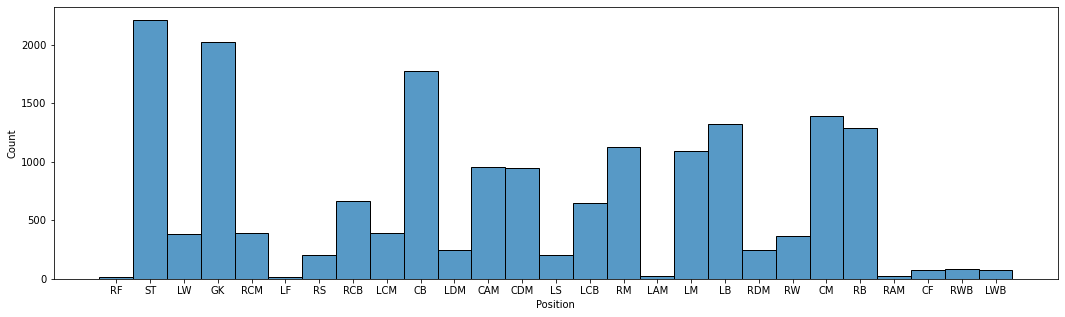

In [40]:
#plot 
plt.figure(figsize=(18, 5))
sns.histplot(df['Position'])
plt.show()

####  Comments for Q 18
- Max. no. of players played at Striker(ST) position. i.e 2212
- Min. no. of players played at Left Forward(LF) position i.e, 15

### 19)How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [41]:
options= ['Juventus']

rslt_df = df[(df['Wage'] > 200000) & 
          df['Club'].isin(options)] 
rslt_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


In [42]:
len(rslt_df)

3

#### There are 3 players in Club Juventus who have wages greater than 200K

### 20) Generate a data frame containing top 5 players by Overall rating for each unique position

In [43]:
top5EachPosition_df=df.groupby('Position').apply(lambda x:x.sort_values(by='Overall', ascending=False).head(5))
top5EachPosition_df

ID               Name  Age Nationality  Overall  Potential  \
Position                                                                      
CAM      17  194765       A. Griezmann   27      France       89         90   
         31  190460         C. Eriksen   26     Denmark       88         91   
         61  201942    Roberto Firmino   26      Brazil       86         87   
         66  189596          T. Müller   28     Germany       86         86   
         74  176635            M. Özil   29     Germany       86         86   
...             ...                ...  ...         ...      ...        ...   
ST       1    20801  Cristiano Ronaldo   33    Portugal       94         94   
         10  188545     R. Lewandowski   29      Poland       90         90   
         16  202126            H. Kane   24     England       89         91   
         23  153079          S. Agüero   30   Argentina       89         89   
         36  173731            G. Bale   28       Wales       88         88   

                          Club       Value      Wage Preferred Foot  ...  \
Position                                                             ...   
CAM      17    Atlético Madrid  78000000.0  145000.0           Left  ...   
         31  Tottenham Hotspur  73500000.0  205000.0          Right  ...   
         61          Liverpool  53000000.0  195000.0          Right  ...   
         66  FC Bayern München  45000000.0  135000.0          Right  ...   
         74            Arsenal  43500000.0  190000.0           Left  ...   
...                        ...         ...       ...            ...  ...   
ST       1            Juventus  77000000.0  405000.0          Right  ...   
         10  FC Bayern München  77000000.0  205000.0          Right  ...   
         16  Tottenham Hotspur  83500000.0  205000.0          Right  ...   
         23    Manchester City  64500000.0  300000.0          Right  ...   
         36        Real Madrid  60000000.0  355000.0           Left  ...   

             Composure  Marking  StandingTackle SlidingTackle GKDiving  \
Position                                                                 
CAM      17       87.0     59.0            47.0          48.0     14.0   
         31       88.0     59.0            57.0          22.0      9.0   
         61       87.0     60.0            64.0          42.0      8.0   
         66       83.0     44.0            41.0          44.0      6.0   
         74       82.0     24.0            16.0          19.0      6.0   
...                ...      ...             ...           ...      ...   
ST       1        95.0     28.0            31.0          23.0      7.0   
         10       86.0     34.0            42.0          19.0     15.0   
         16       89.0     56.0            36.0          38.0      8.0   
         23       90.0     30.0            20.0          12.0     13.0   
         36       86.0     54.0            55.0          52.0     15.0   

            GKHandling  GKKicking  GKPositioning GKReflexes  Release Clause  
Position                                                                     
CAM      17        8.0       14.0           13.0       14.0     165800000.0  
         31       14.0        7.0            7.0        6.0     141500000.0  
         61       11.0        9.0            6.0       10.0     104700000.0  
         66        7.0       11.0           14.0       14.0      74300000.0  
         74       14.0       10.0            6.0       14.0      82700000.0  
...                ...        ...            ...        ...             ...  
ST       1        11.0       15.0           14.0       11.0     127100000.0  
         10        6.0       12.0            8.0       10.0     127100000.0  
         16       10.0       11.0           14.0       11.0     160700000.0  
         23       15.0        6.0           11.0       14.0     119300000.0  
         36       15.0       11.0            5.0        6.0     123000000.0  

[135 rows x 56 columns

### 21) What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q20)

In [44]:
avgWage=top5EachPosition_df['Wage'].groupby(by='Position').mean()
display(avgWage)

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64